# INSTRUCTIONS

Run each cell in order. Put or extract data into relevant folders as defined in section 2. Make remaining folders in drive.  **Cells denoted with * may require extra action.**


```
Folder Structure Suggested for Section 2:
drive/
    train_data/ <- input midis go here
    train_output/
        graphs/ <- train/val accuracy plots go here
        intermed/ <- intermediate weights, preprocessing go here
        stats/ (currently not being used)
        midi/ <- output midis go here
```

# 1 Imports

In [1]:
# Import Data Manip, Debug
import glob
import pickle
import numpy as np
import pandas as pd
import pdb
import matplotlib.pyplot as plt

# Import Music21
!pip install music21
from music21 import converter, instrument, note, chord, stream

# Import Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import TimeDistributed
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import GRU
from keras.layers import CuDNNLSTM
from keras.layers import CuDNNGRU
from keras.layers import Activation
from keras.layers import Bidirectional
from keras.layers import RepeatVector
from keras.layers import Flatten, Conv1D, BatchNormalization, MaxPooling1D
from keras.regularizers import L1L2
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from keras.callbacks import History

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


# 2 Mount and Set Directories*

In [2]:
DATA_FOLDER = 'drive/train_data/folk'
GRAPHS_FOLDER = 'drive/train_output/graphs'
MIDI_OUTPUT_FOLDER = 'drive/train_output/midi'
INTERMED_FOLDER = 'drive/train_output/intermed'
STATS_FOLDER = 'drive/train_output/stats'

# data specific
EDM_CORPUS = '/edm_'
FOLK_CORPUS = '/folk_'
# SET THIS TO ONE OF ABOVE (ACTION)
CORPUS = FOLK_CORPUS

# 3 Set Training Parameters*

In [3]:
# SET PARAMETERS (ACTION)
RESTS = False
# SPECIFY PARAMETERS TO TEST AS LIST
DROPOUTS = [1, 0.5, 0.3]
MODEL_SIZES = [64, 256, 512]
EPOCHS = 10

# 4 Preprocess Data (MIDI Data Into Notes Corpus and Duration Corpus)

In [4]:
# Test

notes_corpus = []
durations_corpus = []

for file in glob.glob(DATA_FOLDER + "/*.mid"):
    try:
      print("Extracting MIDI File: ", file)
      midi_stream = converter.parse(file)

      notes = None

      partition = instrument.partitionByInstrument(midi_stream)

      if not RESTS:
        # No rests
        if partition: 
            notes = partition.parts[0].recurse()
        else: 
            notes = midi_stream.flat.notes
      else:
        # With rests
        if partition: 
            notes = partition.parts[0].recurse()
        else: 
            notes = midi_stream.notesAndRests
          
      in_song_notes = []
      in_song_durations = []
      for element in notes:
          in_song_durations.append(element.duration.quarterLength)
          if isinstance(element, note.Note):
              in_song_notes.append(str(element.pitch))
          elif RESTS and isinstance(element, note.Rest):
              in_song_notes.append("R")
          elif isinstance(element, chord.Chord):
              in_song_notes.append(element.root().nameWithOctave)
#               in_song.append('.'.join(str(n) for n in element.normalOrder))
    except:
      pass
    
    notes_corpus.append(in_song_notes)
    durations_corpus.append(in_song_durations)
            
# Write
with open(INTERMED_FOLDER + CORPUS + 'notes_corpus', 'wb+') as filepath:
    pickle.dump(notes_corpus, filepath)
    
with open(INTERMED_FOLDER + CORPUS + 'durations_corpus', 'wb+') as filepath:
    pickle.dump(durations_corpus, filepath)

Extracting MIDI File:  drive/train_data/folk\sessiontune10.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune100.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune1000.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune1001.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune1002.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune1003.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune1004.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune1005.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune1006.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune1007.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune1008.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune1009.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune101.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune1010.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune1011.mid
Extracting MIDI File:  drive/

Extracting MIDI File:  drive/train_data/folk\sessiontune1117.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune1118.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune1119.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune112.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune1120.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune1121.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune1122.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune1123.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune1124.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune1125.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune1126.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune1127.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune1128.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune1129.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune113.mid
Extracting MIDI File:  driv

Extracting MIDI File:  drive/train_data/folk\sessiontune1349.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune135.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune1350.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune1351.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune1352.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune1353.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune1354.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune1355.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune1356.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune1357.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune1358.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune1359.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune136.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune1360.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune1361.mid
Extracting MIDI File:  driv

Extracting MIDI File:  drive/train_data/folk\sessiontune1466.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune1467.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune1468.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune1469.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune147.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune1470.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune1471.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune1472.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune1473.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune1474.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune1475.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune1476.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune1477.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune1478.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune1479.mid
Extracting MIDI File:  dri

Extracting MIDI File:  drive/train_data/folk\sessiontune1695.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune1696.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune1697.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune1698.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune1699.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune17.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune170.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune1700.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune1701.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune1702.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune1703.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune1704.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune1705.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune1706.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune1707.mid
Extracting MIDI File:  drive

Extracting MIDI File:  drive/train_data/folk\sessiontune181.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune1810.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune1811.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune1812.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune1813.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune1814.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune1815.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune1816.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune1817.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune1818.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune1819.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune182.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune1820.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune1821.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune1822.mid
Extracting MIDI File:  driv

Extracting MIDI File:  drive/train_data/folk\sessiontune1925.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune1926.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune1927.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune1928.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune1929.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune193.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune1930.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune1931.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune1932.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune1933.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune1934.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune1935.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune1936.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune1937.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune1938.mid
Extracting MIDI File:  dri

Extracting MIDI File:  drive/train_data/folk\sessiontune2042.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2043.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2044.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2045.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2046.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2047.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2048.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2049.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune205.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2050.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2051.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2052.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2053.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2054.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2055.mid
Extracting MIDI File:  dri

Extracting MIDI File:  drive/train_data/folk\sessiontune2166.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2167.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2168.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2169.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune217.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2170.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2171.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2172.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2173.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2174.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2175.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2176.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2177.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2178.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2179.mid
Extracting MIDI File:  dri

Extracting MIDI File:  drive/train_data/folk\sessiontune2283.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2284.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2285.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2286.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2287.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2288.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2289.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune229.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2290.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2291.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2292.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2293.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2294.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2295.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2296.mid
Extracting MIDI File:  dri

Extracting MIDI File:  drive/train_data/folk\sessiontune2407.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2408.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2409.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune241.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2410.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2411.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2412.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2413.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2414.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2415.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2416.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2417.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2418.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2419.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune242.mid
Extracting MIDI File:  driv

Extracting MIDI File:  drive/train_data/folk\sessiontune2523.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2524.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2525.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2526.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2527.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2528.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2529.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune253.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2530.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2531.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2532.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2533.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2534.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2535.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2536.mid
Extracting MIDI File:  dri

Extracting MIDI File:  drive/train_data/folk\sessiontune2753.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2754.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2755.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2756.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2757.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2758.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2759.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune276.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2760.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2761.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2762.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2763.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2764.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2765.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2766.mid
Extracting MIDI File:  dri

Extracting MIDI File:  drive/train_data/folk\sessiontune2875.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2876.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2877.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2878.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2879.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune288.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2880.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2881.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2882.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2883.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2884.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2885.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2886.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2887.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2888.mid
Extracting MIDI File:  dri

Extracting MIDI File:  drive/train_data/folk\sessiontune2994.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2995.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2996.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2997.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2998.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune2999.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune30.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune300.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3000.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3001.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3002.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3003.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3004.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3005.mid
Extracting MIDI File:  drive/tr

Extracting MIDI File:  drive/train_data/folk\sessiontune3112.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3113.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3114.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3115.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3116.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3117.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3118.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3119.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune312.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3120.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3121.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3122.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3123.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3124.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3125.mid
Extracting MIDI File:  dri

Extracting MIDI File:  drive/train_data/folk\sessiontune3230.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3231.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3232.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3233.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3234.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3235.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3236.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3237.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3238.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3239.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune324.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3240.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3241.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3242.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3243.mid
Extracting MIDI File:  dri

Extracting MIDI File:  drive/train_data/folk\sessiontune3350.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3351.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3352.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3353.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3354.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3355.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3356.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3357.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3358.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3359.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune336.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3360.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3361.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3362.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3363.mid
Extracting MIDI File:  dri

Extracting MIDI File:  drive/train_data/folk\sessiontune347.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3470.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3471.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3472.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3473.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3474.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3475.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3476.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3477.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3478.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3479.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune348.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3480.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3481.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3482.mid
Extracting MIDI File:  driv

Extracting MIDI File:  drive/train_data/folk\sessiontune3584.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3585.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3586.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3587.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3588.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3589.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune359.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3590.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3591.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3592.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3593.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3594.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3595.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3596.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3597.mid
Extracting MIDI File:  dri

Extracting MIDI File:  drive/train_data/folk\sessiontune3706.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3707.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3708.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3709.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune371.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3710.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3711.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3712.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3713.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3714.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3715.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3716.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3717.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3718.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3719.mid
Extracting MIDI File:  dri

Extracting MIDI File:  drive/train_data/folk\sessiontune3824.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3825.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3826.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3827.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3828.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3829.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune383.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3830.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3831.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3832.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3833.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3834.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3835.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3836.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3837.mid
Extracting MIDI File:  dri

Extracting MIDI File:  drive/train_data/folk\sessiontune3942.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3943.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3944.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3945.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3946.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3947.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3948.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3949.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune395.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3950.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3951.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3952.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3953.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3954.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune3955.mid
Extracting MIDI File:  dri

Extracting MIDI File:  drive/train_data/folk\sessiontune4056.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4057.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4058.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4059.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune406.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4060.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4061.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4062.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4063.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4064.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4065.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4066.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4067.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4068.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4069.mid
Extracting MIDI File:  dri

Extracting MIDI File:  drive/train_data/folk\sessiontune4176.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4177.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4178.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4179.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune418.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4180.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4181.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4182.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4183.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4184.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4185.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4186.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4187.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4188.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4189.mid
Extracting MIDI File:  dri

Extracting MIDI File:  drive/train_data/folk\sessiontune4290.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4291.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4292.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4293.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4294.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4295.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4296.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4297.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4298.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4299.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune43.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune430.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4300.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4301.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4302.mid
Extracting MIDI File:  drive

Extracting MIDI File:  drive/train_data/folk\sessiontune4409.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune441.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4410.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4411.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4412.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4413.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4414.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4415.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4416.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4417.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4418.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4419.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune442.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4420.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4421.mid
Extracting MIDI File:  driv

Extracting MIDI File:  drive/train_data/folk\sessiontune4527.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4528.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4529.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune453.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4530.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4531.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4532.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4533.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4534.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4535.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4536.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4537.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4538.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4539.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune454.mid
Extracting MIDI File:  driv

Extracting MIDI File:  drive/train_data/folk\sessiontune4645.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4646.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4647.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4648.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4649.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune465.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4650.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4651.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4652.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4653.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4654.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4655.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4656.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4657.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4658.mid
Extracting MIDI File:  dri

Extracting MIDI File:  drive/train_data/folk\sessiontune4763.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4764.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4765.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4766.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4767.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4768.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4769.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune477.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4770.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4771.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4772.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4773.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4774.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4775.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4776.mid
Extracting MIDI File:  dri

Extracting MIDI File:  drive/train_data/folk\sessiontune488.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4880.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4881.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4882.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4883.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4884.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4885.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4886.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4887.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4888.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4889.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune489.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4890.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4891.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4892.mid
Extracting MIDI File:  driv

Extracting MIDI File:  drive/train_data/folk\sessiontune4997.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4998.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune4999.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune5.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune50.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune500.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune5000.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune5001.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune5002.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune5003.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune5004.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune5005.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune5006.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune5007.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune5008.mid
Extracting MIDI File:  drive/tr

Extracting MIDI File:  drive/train_data/folk\sessiontune551.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune552.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune553.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune554.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune555.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune556.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune557.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune558.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune559.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune56.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune560.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune561.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune562.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune563.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune564.mid
Extracting MIDI File:  drive/train_data/f

Extracting MIDI File:  drive/train_data/folk\sessiontune673.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune674.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune675.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune676.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune677.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune678.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune679.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune68.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune680.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune681.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune682.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune683.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune684.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune685.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune686.mid
Extracting MIDI File:  drive/train_data/f

Extracting MIDI File:  drive/train_data/folk\sessiontune912.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune913.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune914.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune915.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune916.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune917.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune918.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune919.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune92.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune920.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune921.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune922.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune923.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune924.mid
Extracting MIDI File:  drive/train_data/folk\sessiontune925.mid
Extracting MIDI File:  drive/train_data/f

# 5 Preprocess Corpus Into Train Data

## 5.1 Notes Corpus

In [4]:
# load notes corpus
with open(INTERMED_FOLDER + CORPUS + 'notes_corpus', 'rb') as filepath:
    notes_corpus = pickle.load(filepath)
    
# If doing learning for one song at a time only
flattened_notes_corpus = []
for song_notes in notes_corpus:
    flattened_notes_corpus += song_notes

vocab_size = len(set(flattened_notes_corpus))
print(vocab_size)

# Produce input output sequences
window_size = 30
note_sequence_input = []
next_note_output = []

notes = sorted(set(flattened_notes_corpus))
note2int = dict((note, num) for num, note in enumerate(notes))

for i in range(0, len(notes_corpus)):
    for j in range(0, len(notes_corpus[i]) - window_size):
        current_sequence = [note2int[note] for note in notes_corpus[i][j:window_size+j]]
        next_note = note2int[notes_corpus[i][window_size+j]]
        note_sequence_input.append(current_sequence)
        next_note_output.append(next_note)

43


In [5]:
# check train and label shapes
training_data = np.reshape(note_sequence_input, (len(note_sequence_input), window_size , 1))
training_data = training_data / float(vocab_size)
print('Train shape: ' + str(training_data.shape))
training_label = np_utils.to_categorical(next_note_output)
print('Label shape: ' + str(training_label.shape))

Train shape: (799705, 30, 1)
Label shape: (799705, 43)


## 5.2 Durations Corpus

In [6]:
# load notes corpus
with open(INTERMED_FOLDER + CORPUS + 'durations_corpus', 'rb') as filepath:
    duration_corpus = pickle.load(filepath)

# Learn on one song at a time
flattened_duration_corpus = []
for song_durations in duration_corpus:
    flattened_duration_corpus += song_durations
    
import collections
counter = collections.Counter(flattened_duration_corpus)
print(counter)


duration_vocab_size = len(set(flattened_duration_corpus))
print(duration_vocab_size)

# Produce input output sequences
duration_window_size = 30
duration_sequence_input = []
next_duration_output = []

durations = sorted(set(flattened_duration_corpus))
duration2int = dict((duration, num) for num, duration in enumerate(durations))

print(duration2int)
# Write
with open(INTERMED_FOLDER + "/edm_duration_counter", 'wb+') as filepath:
    pickle.dump(counter, filepath)

for i in range(0, len(duration_corpus)):
    for j in range(0, len(duration_corpus[i]) - duration_window_size):
        current_duration_sequence = [duration2int[note] for note in duration_corpus[i][j:duration_window_size+j]]
        next_duration = duration2int[duration_corpus[i][duration_window_size+j]]
        duration_sequence_input.append(current_duration_sequence)
        next_duration_output.append(next_duration)

Counter({0.5: 648306, 1.0: 97684, Fraction(1, 3): 67067, 0.25: 61598, Fraction(2, 3): 29074, 1.5: 21210, 0.0: 15440, 2.0: 6626, 0.75: 1722, 3.0: 1328, 2.5: 405, Fraction(5, 3): 302, 4.0: 247, 5.0: 160, Fraction(4, 3): 88, 1.25: 59, 3.5: 59, 6.0: 54, 1.75: 47, 4.5: 46, 2.25: 22, 7.0: 10, 6.5: 7, 8.0: 6, Fraction(8, 3): 5, 5.5: 5, 4.25: 4, Fraction(7, 3): 4, Fraction(17, 3): 2, 7.5: 1})
30
{0.0: 0, 0.25: 1, Fraction(1, 3): 2, 0.5: 3, Fraction(2, 3): 4, 0.75: 5, 1.0: 6, 1.25: 7, Fraction(4, 3): 8, 1.5: 9, Fraction(5, 3): 10, 1.75: 11, 2.0: 12, 2.25: 13, Fraction(7, 3): 14, 2.5: 15, Fraction(8, 3): 16, 3.0: 17, 3.5: 18, 4.0: 19, 4.25: 20, 4.5: 21, 5.0: 22, 5.5: 23, Fraction(17, 3): 24, 6.0: 25, 6.5: 26, 7.0: 27, 7.5: 28, 8.0: 29}


In [7]:
# check train and label shapes
duration_training_data = np.reshape(duration_sequence_input, (len(duration_sequence_input), duration_window_size , 1))
duration_training_data = duration_training_data / float(duration_vocab_size)
print('Train shape: ' + str(duration_training_data.shape))
duration_training_label = np_utils.to_categorical(next_duration_output)
print('Label shape: ' + str(duration_training_label.shape))

Train shape: (799705, 30, 1)
Label shape: (799705, 30)


# 6 Train

## 6.1 Helper to Create Model

In [8]:
def create_model(network_input, n_vocab, model_size, dropout):
  model = Sequential()
  model.add(LSTM(
      model_size,
      #input_shape=(network_input.shape[1], network_input.shape[2]),
      return_sequences=True,
      dropout=dropout, recurrent_dropout=0.3
  ))
  model.add(CuDNNLSTM(model_size, return_sequences=True))
  model.add(Dropout(dropout))
  model.add(CuDNNLSTM(model_size))
  model.add(Dense(128))
  model.add(Dropout(dropout))
  model.add(Dense(n_vocab))
  model.add(Activation('softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

def create_callback_list(model_size, dropout, model_type):
  filepath = INTERMED_FOLDER + '/%skarpathy-model-weights-%s-%s-%s.hdf5' % (CORPUS, model_type, model_size, dropout)
  model_checkpoint = ModelCheckpoint(
    filepath,
    monitor='loss',
    verbose=0,
    save_best_only=True,
    mode='min'
  )
  return [model_checkpoint], filepath

# acc history
def setup_plot(dropout, size):
  plt.title('Model Accuracy vs. Epoc with Dropout=%s Size=%s' % (dropout, size))
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  
def plot_history(history, model_type, dropout, size):
  plt.plot(history.history['acc'], label="%s train accuracy" % model_type)
  plt.plot(history.history['val_acc'], label="%s val accuracy" % model_type)

def save_plot(file_path):
  plt.legend()
  plt.savefig(file_path)
  plt.clf()
  
def predict_duration(model, WEIGHT_PATH):
  # Prediction
  model.load_weights(WEIGHT_PATH)
  starting_sequence = np.random.randint(219, size=duration_window_size)
  pattern_sequence = starting_sequence.tolist()
  prediction_output = []

  duration2note = dict((num, note) for num, note in enumerate(durations))
  print (duration2note)
  
  for i in range(400):
      prediction_input = np.reshape(pattern_sequence, (1, len(pattern_sequence), 1))
      prediction_input = prediction_input / float(duration_vocab_size)

      if i%3 == 0:   
          print('\r', 'Predicting.  Duration: ', i, end='')  
      if i%3 == 1:   
          print('\r', 'Predicting.. Duration: ', i, end='')
      if i%3 == 2:   
          print('\r', 'Predicting...Duration: ', i, end='')
      prediction = model.predict(prediction_input, verbose=0)

#       prediction_values = np.arange(len(prediction[0]))
#       prediction_prob = np.asarray(list(prediction[0])) / float(sum(prediction[0]))

      # Most probable note prediction
      index = np.argmax(prediction)
      note_instance = duration2note[index]
      prediction_output.append(note_instance)
#       index = np.random.choice(prediction_values, 1, p=prediction_prob)
#       note_instance = int2note[int(index[0])]
#       prediction_output.append(note_instance)

      pattern_sequence.append(index)
      pattern_sequence = pattern_sequence[1:len(pattern_sequence)]    

  prediction_output = prediction_output[300:len(prediction_output)]

  # Write
  with open(INTERMED_FOLDER + ("%sduration_prediction_output" % CORPUS), 'wb+') as filepath:
      pickle.dump(prediction_output, filepath)
  
  return prediction_output

def predict_note(model, WEIGHT_PATH):
  model.load_weights(WEIGHT_PATH)
  # Prediction
  starting_sequence = np.random.randint(219, size=window_size)
  pattern_sequence = starting_sequence.tolist()
  prediction_output = []

  int2note = dict((num, note) for num, note in enumerate(notes))
  print (int2note)

  for i in range(400):
      prediction_input = np.reshape(pattern_sequence, (1, len(pattern_sequence), 1))
      prediction_input = prediction_input / float(vocab_size)

      if i%3 == 0:   
          print('\r', 'Predicting.  Note: ', i, end='')  
      if i%3 == 1:   
          print('\r', 'Predicting.. Note: ', i, end='')
      if i%3 == 2:   
          print('\r', 'Predicting...Note: ', i, end='')
      prediction = model.predict(prediction_input, verbose=0)

#       prediction_values = np.arange(len(prediction[0]))
#       prediction_prob = np.asarray(list(prediction[0])) / float(sum(prediction[0]))
#       print(prediction_prob)

      # Most probable note prediction
      index = np.argmax(prediction)
      note_instance = int2note[index]
      prediction_output.append(note_instance)

      # Predict based on prob dist
#       index = np.random.choice(prediction_values, 1, p=prediction_prob)
  #     print(index[0])
  #     print(type(index[0]))
#       note_instance = int2note[int(index[0])]
#       prediction_output.append(note_instance)

      pattern_sequence.append(index)
      pattern_sequence = pattern_sequence[1:len(pattern_sequence)]    

  prediction_output = prediction_output[300:len(prediction_output)]
  # Write
  with open(INTERMED_FOLDER + ("%snotes_prediction_output" % CORPUS), 'wb+') as filepath:
      pickle.dump(prediction_output, filepath)
  return prediction_output

def output_midi(prediction_output, duration_prediction_output, dropout, model_size):
  offset = 0
  output_notes = []
  for pattern, duration in zip(prediction_output, duration_prediction_output):

      if ('.' in pattern) or pattern.isdigit():
          chord_array = pattern.split('.')
          chord_notes = []
          for note_instance in chord_array:
              note_object = note.Note(int(note_instance))
              note_object.duration.quarterLength = duration
              note_object.storedInstrument = instrument.Piano()
              chord_notes.append(note_object)
          chord_object = chord.Chord(chord_notes)
          chord_object.offset = offset
          output_notes.append(chord_object)
      elif 'R' == pattern:
          note_object = note.Rest()
          note_object.duration.quarterLength = duration
          note_object.offset = offset
          output_notes.append(note_object)
      else:
          note_object = note.Note(pattern)
          note_object.duration.quarterLength = duration
          note_object.offset = offset
          note_object.storedInstrument = instrument.Piano()
          output_notes.append(note_object)

      offset += 0.5

  midi_stream = stream.Stream(output_notes)
  midi_stream.write('midi', fp=MIDI_OUTPUT_FOLDER + CORPUS + '%s_%s.mid' % (dropout, model_size))
  print('Wrote midi...')

Running duration training on dropout:1 size:64
Train on 639764 samples, validate on 159941 samples
Epoch 1/10
639764/639764 [==============================] - 48s 75us/step - loss: 1.0493 - acc: 0.7138 - val_loss: 0.9722 - val_acc: 0.7141
Epoch 2/10
639764/639764 [==============================] - 45s 71us/step - loss: 0.9513 - acc: 0.7244 - val_loss: 0.9596 - val_acc: 0.7201
Epoch 3/10
639764/639764 [==============================] - 45s 70us/step - loss: 0.9448 - acc: 0.7250 - val_loss: 0.9559 - val_acc: 0.7185
Epoch 4/10
639764/639764 [==============================] - 45s 71us/step - loss: 0.9279 - acc: 0.7252 - val_loss: 0.9540 - val_acc: 0.7178
Epoch 5/10
639764/639764 [==============================] - 46s 71us/step - loss: 0.8608 - acc: 0.7325 - val_loss: 0.8607 - val_acc: 0.7285
Epoch 6/10
639764/639764 [==============================] - 46s 71us/step - loss: 0.8078 - acc: 0.7464 - val_loss: 0.8182 - val_acc: 0.7400
Epoch 7/10
639764/639764 [==============================] - 4

639764/639764 [==============================] - 316s 493us/step - loss: 0.9934 - acc: 0.7192 - val_loss: 0.9823 - val_acc: 0.7167
Epoch 2/10
639764/639764 [==============================] - 314s 491us/step - loss: 0.9515 - acc: 0.7235 - val_loss: 1.0661 - val_acc: 0.7132
Epoch 3/10
639764/639764 [==============================] - 316s 495us/step - loss: 0.8576 - acc: 0.7445 - val_loss: 0.6694 - val_acc: 0.7960
Epoch 4/10
639764/639764 [==============================] - 314s 491us/step - loss: 0.5603 - acc: 0.8246 - val_loss: 0.5600 - val_acc: 0.8175
Epoch 5/10
639764/639764 [==============================] - 315s 492us/step - loss: 0.5028 - acc: 0.8369 - val_loss: 0.5390 - val_acc: 0.8217
Epoch 6/10
639764/639764 [==============================] - 311s 486us/step - loss: 0.4807 - acc: 0.8429 - val_loss: 0.5301 - val_acc: 0.8272
Epoch 7/10
639764/639764 [==============================] - 312s 488us/step - loss: 0.4609 - acc: 0.8480 - val_loss: 0.5192 - val_acc: 0.8292
Epoch 8/10
639764

639764/639764 [==============================] - 123s 193us/step - loss: 1.1494 - acc: 0.6879 - val_loss: 1.2096 - val_acc: 0.6824
Epoch 3/10
639764/639764 [==============================] - 124s 193us/step - loss: 1.0914 - acc: 0.6986 - val_loss: 2.0683 - val_acc: 0.1126
Epoch 4/10
639764/639764 [==============================] - 122s 191us/step - loss: 1.0657 - acc: 0.7035 - val_loss: 1.8861 - val_acc: 0.1006
Epoch 5/10
639764/639764 [==============================] - 122s 191us/step - loss: 1.0385 - acc: 0.7050 - val_loss: 1.7396 - val_acc: 0.1255
Epoch 6/10
639764/639764 [==============================] - 123s 192us/step - loss: 0.9155 - acc: 0.7372 - val_loss: 2.2656 - val_acc: 0.0949
Epoch 7/10
639764/639764 [==============================] - 122s 191us/step - loss: 0.8752 - acc: 0.7478 - val_loss: 3.0604 - val_acc: 0.0729
Epoch 8/10
639764/639764 [==============================] - 122s 191us/step - loss: 0.8554 - acc: 0.7530 - val_loss: 2.8122 - val_acc: 0.0966
Epoch 9/10
639764

639764/639764 [==============================] - 46s 72us/step - loss: 0.9945 - acc: 0.7128 - val_loss: 1.4513 - val_acc: 0.5407
Epoch 5/10
639764/639764 [==============================] - 46s 72us/step - loss: 0.9865 - acc: 0.7131 - val_loss: 1.3339 - val_acc: 0.6571
Epoch 6/10
639764/639764 [==============================] - 46s 72us/step - loss: 0.9811 - acc: 0.7133 - val_loss: 1.4403 - val_acc: 0.5747
Epoch 7/10
639764/639764 [==============================] - 46s 72us/step - loss: 0.9374 - acc: 0.7184 - val_loss: 1.4508 - val_acc: 0.4700
Epoch 8/10
639764/639764 [==============================] - 46s 72us/step - loss: 0.8917 - acc: 0.7294 - val_loss: 1.5942 - val_acc: 0.3526
Epoch 9/10
639764/639764 [==============================] - 46s 72us/step - loss: 0.8535 - acc: 0.7394 - val_loss: 1.6860 - val_acc: 0.2829
Epoch 10/10
639764/639764 [==============================] - 46s 72us/step - loss: 0.8113 - acc: 0.7555 - val_loss: 2.2960 - val_acc: 0.1598
{0: 0.0, 1: 0.25, 2: Fraction(

InternalError: Failed to call ThenRnnBackward with model config: [rnn_mode, rnn_input_mode, rnn_direction_mode]: 2, 0, 0 , [num_layers, input_size, num_units, dir_count, seq_length, batch_size]: [1, 512, 512, 1, 30, 1024] 
	 [[{{node training_16/Adam/gradients/cu_dnnlstm_34/CudnnRNN_grad/CudnnRNNBackprop}} = CudnnRNNBackprop[T=DT_FLOAT, direction="unidirectional", dropout=0, input_mode="linear_input", rnn_mode="lstm", seed=87654321, seed2=0, _device="/job:localhost/replica:0/task:0/device:GPU:0"](cu_dnnlstm_34/transpose, cu_dnnlstm_34/ExpandDims_1, cu_dnnlstm_34/ExpandDims_1, cu_dnnlstm_34/concat_1, cu_dnnlstm_34/CudnnRNN, cu_dnnlstm_34/CudnnRNN:1, cu_dnnlstm_34/CudnnRNN:2, training_16/Adam/gradients/cu_dnnlstm_34/strided_slice_16_grad/StridedSliceGrad, training_16/Adam/gradients/zeros_like, training_16/Adam/gradients/zeros_like_1, cu_dnnlstm_34/CudnnRNN:3)]]

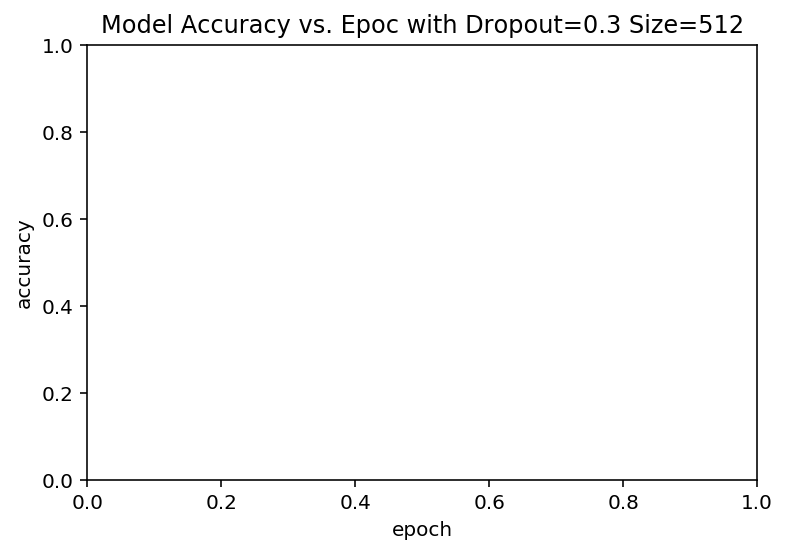

In [9]:
notes_histories = {}
duration_histories = {}
for dropout in DROPOUTS:
  for model_size in MODEL_SIZES:
    setup_plot(dropout, model_size)
    print('Running duration training on dropout:%s size:%s' % (dropout, model_size))
    duration_callbacks, duration_weight_path = create_callback_list('duration', dropout, model_size)
    duration_model = create_model(duration_training_data, duration_vocab_size, model_size, dropout)
    duration_histories[(dropout, model_size)] = duration_model.fit(duration_training_data, duration_training_label, epochs=EPOCHS, batch_size=1024, callbacks=duration_callbacks, validation_split=0.2)
    plot_history(duration_histories[(dropout, model_size)], 'Durations', dropout, model_size)
    # output intermed duration
    duration_prediction = predict_duration(duration_model, duration_weight_path)
    
    print('\n\nRunning notes training on d:%s s:%s' % (dropout, model_size))
    notes_callbacks, note_weight_path = create_callback_list('notes', dropout, model_size)
    notes_model = create_model(training_data, vocab_size, model_size, dropout)
    notes_histories[(dropout, model_size)] = notes_model.fit(training_data, training_label, epochs=EPOCHS, batch_size=735, callbacks=notes_callbacks, validation_split=0.2)
    plot_history(notes_histories[(dropout, model_size)], 'Notes', dropout, model_size)
    save_plot(GRAPHS_FOLDER + CORPUS + 'dropout=%s_size=%s.jpg' % (dropout, model_size))
    # output intermed notes
    note_prediction = predict_note(notes_model, note_weight_path)
    
    # output final midi
    output_midi(note_prediction, duration_prediction, dropout, model_size)